# Ising Model

In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


#T = 2                          #temp in units if j and kb


neqil = 2500
nitter = 5000                   #monte carlo steps
j_ising = 1                     #j in hamiltonian of ising model
E , M = 0, 0                    #
l = 20                          #lattice length
spin = np.ones((l, l))          #2d lattice

#randomize the lattice

for i in range(l):
    for j in range(l):
        if rnd.uniform(0,1) < 0.5:
            spin[i][j] = -1
            
#claculating initial energy and magnetizaton of lattice
for i in range(l):
        for j in range(l):
            
            a, b, c, d = i + 1, i - 1, j + 1, j - 1                     #identifying neighbours
            if (i == l - 1): a = 0                                      #-----------------------
            if (i == 0): b = l - 1                                      #periodic boundry condition
            if (j == l - 1): c = 0
            if (j == 0): d = l - 1                                      #-----------------------
            
            
            E = E - j_ising*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))
            M = M + spin[i][j]


E = E/2                                                 #energy (divided by two because counted spin pairs twice)
mag = M/(l*l)                                           #magnetization per spin

print(f"initial    energy = {E}    magnetization = {mag}    M = {M}")

#evolving the sytem to equilibrium   
magnetization = []
energy = []
cvlist = []
Xlist = []
Temperature = []
for temp in range(150, 301):
    
    T = temp/100
    avg_e, avg_m = 0, 0
    avg_e_n, avg_m_n = 0, 0
    avg_e_2, avg_m_2 = 0, 0
    
    #evolving the sytem to equilibrium 
    for  time in range(nitter):
        for itter1 in range(l):
            for itter2 in range(l):
                i = int(rnd.uniform(0,1)*l) 
                j = int(rnd.uniform(0,1)*l)
                
                a, b, c, d = i + 1, i - 1, j + 1, j - 1                     #identifying neighbours
                if (i == l - 1): a = 0                                      #-----------------------
                if (i == 0): b = l - 1                                      #periodic boundry condition
                if (j == l - 1): c = 0
                if (j == 0): d = l - 1                                      #-----------------------
                
                #energy before flip
                Ei = (-j_ising)*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))
                
                spin[i][j] = -spin[i][j]                                    #trial flip
                
                #energy after flip
                Ef = (-j_ising)*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))

                #Metropolis Algorithm
                #-----------------------------------
                if(Ef - Ei <= 0):
                    E += (Ef - Ei)
                    M += 2*spin[i][j]
                else:
                    h = rnd.uniform(0,1)
                    if(h < np.exp(-(Ef - Ei)/T)):
                        E += (Ef - Ei)
                        M += 2*spin[i][j]
                    else:
                        spin[i][j] = -spin[i][j]
                #-------------------------------------
        if(time >= neqil):
            mag = abs(M)/l**2
            avg_m += mag
            avg_e += E/l**2
            avg_m_2 += M**2
            avg_e_2 += E**2
            avg_m_n += M
            avg_e_n += E
            
    avg_e_2 = avg_e_2/(nitter - neqil)
    avg_m_2 = avg_m_2/(nitter - neqil)
    avg_m_n = avg_m_n/(nitter - neqil)
    avg_e_n = avg_e_n/(nitter - neqil)
    X = (avg_m_2 - avg_m_n**2)/T
    cv = (avg_e_2 - avg_e_n**2)/T**2
    Xlist.append(X)
    cvlist.append(cv)
    energy.append(avg_e/(nitter - neqil))
    magnetization.append(avg_m/(nitter - neqil))
    Temperature.append(T)

initial    energy = 0.0    magnetization = 0.005    M = 2.0


In [3]:
nitter - neqil

2500

### Plot between Energy per spin and Temperature

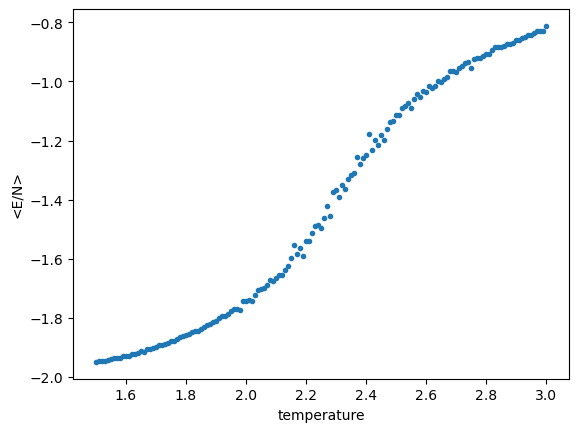

In [4]:
plt.scatter(Temperature, energy, marker = ".");
plt.xlabel("temperature");
plt.ylabel("<E/N>");


### Plot between specific heat ($C_v$) and Temperature 

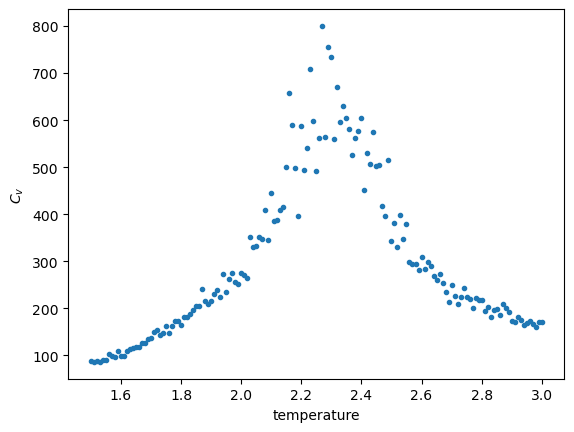

In [5]:
plt.scatter(Temperature, cvlist, marker = ".");
plt.xlabel("temperature");
plt.ylabel("$C_v$");

### Plot between magnetization and temperature


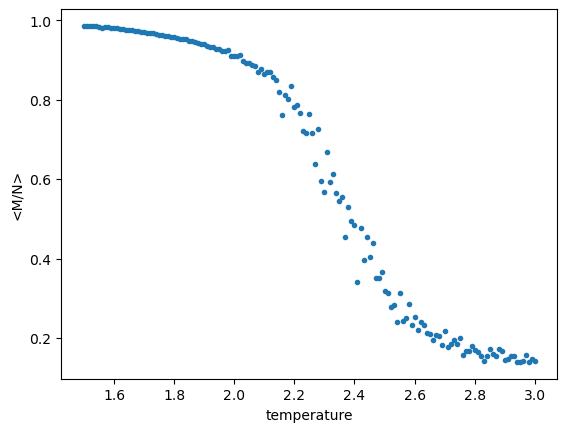

In [10]:
plt.scatter(Temperature, magnetization, marker = '.');
plt.xlabel("temperature");
plt.ylabel("<M/N>");

### Plot between magnetic susceptibility($\chi$) and temp.

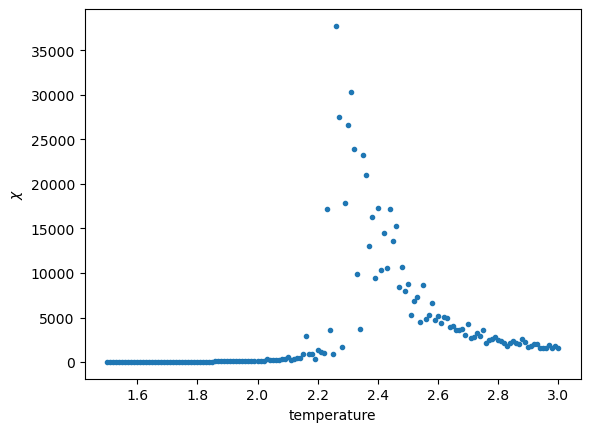

In [12]:
plt.scatter(Temperature, Xlist, marker = '.');
plt.xlabel("temperature");
plt.ylabel("$\chi$");